In [1]:
import math
import torch
import numpy as np
import gpytorch
import pandas as pd
import os
from matplotlib import pyplot as plt

from sklearn.model_selection import KFold

In [6]:
import os


desktop_path = os.path.join(os.path.expanduser('~'), 'Desktop')
capstone_data_path = os.path.join(desktop_path, 'CAPSTONE_DATA')

def find_csv_files(directory):
    csv_files = []
    for root, dirs, files in os.walk(directory):
        for file in files:
            if file.endswith('.csv'):
                csv_files.append(os.path.join(root, file))
    return csv_files

# This will search the entire CAPSTONE_DATA directory tree for CSV files
all_csv_files = find_csv_files(capstone_data_path)

# Print all .csv files found
print("CSV files found:", all_csv_files)



CSV files found: ['/Users/radhi/Desktop/CAPSTONE_DATA/NEK_data_4Berkeley/NEK3/NEK3_binding_random_fold4_trainX.csv', '/Users/radhi/Desktop/CAPSTONE_DATA/NEK_data_4Berkeley/NEK3/NEK3_binding_random_fold2_testY.csv', '/Users/radhi/Desktop/CAPSTONE_DATA/NEK_data_4Berkeley/NEK3/NEK3_binding_random_fold2_testX.csv', '/Users/radhi/Desktop/CAPSTONE_DATA/NEK_data_4Berkeley/NEK3/NEK3_binding_random_fold4_trainY.csv', '/Users/radhi/Desktop/CAPSTONE_DATA/NEK_data_4Berkeley/NEK3/NEK3_binding_random_fold1_trainX.csv', '/Users/radhi/Desktop/CAPSTONE_DATA/NEK_data_4Berkeley/NEK3/NEK3_binding_random_fold1_trainY.csv', '/Users/radhi/Desktop/CAPSTONE_DATA/NEK_data_4Berkeley/NEK3/NEK3_binding_random_fold4_testX.csv', '/Users/radhi/Desktop/CAPSTONE_DATA/NEK_data_4Berkeley/NEK3/NEK3_binding_random_fold4_testY.csv', '/Users/radhi/Desktop/CAPSTONE_DATA/NEK_data_4Berkeley/NEK3/NEK3_binding_random_fold3_testY.csv', '/Users/radhi/Desktop/CAPSTONE_DATA/NEK_data_4Berkeley/NEK3/NEK3_1_uM_min_50_pct_binding_5fold_r

In [2]:
# Binding
import pandas as pd
from sklearn.model_selection import KFold
import os

nek_3 = ["3"]

for nek in nek_3:
    # Get training data
    data_path = "/Users/radhi/Desktop/CAPSTONE_DATA/NEK_data_4Berkeley/NEK" + nek 
    file_name = "NEK" + nek + "_1_uM_min_50_pct_binding_5fold_random_imbalanced.csv"
    file_path = os.path.join(data_path, file_name)

    # Check if the file exists before attempting to read
    if os.path.isfile(file_path):
        binding_df = pd.read_csv(file_path)
        print(binding_df.shape)

        # Continue with the rest of your processing here
        print(binding_df.active.value_counts())
        num_gap = (binding_df.loc[binding_df['active']==0].shape[0]) - (binding_df.loc[binding_df['active']==1].shape[0])
        print(num_gap)
        num_minority = binding_df.loc[binding_df['active']==1].shape[0]
        print(num_minority)

    # Separate majority and minority classes
        df_majority = binding_df[binding_df['active']==0]
        df_minority = binding_df[binding_df['active']==1]

        #=======================
        # Create 5-fold splits
        #=======================
        kf = KFold(n_splits=5, shuffle=True, random_state=0)

        # majority
        for i, (_, v_ind) in enumerate(kf.split(df_majority)):
            df_majority.loc[df_majority.index[v_ind], 'fold'] = f"fold{i+1}"

        # minority
        for i, (_, v_ind) in enumerate(kf.split(df_minority)):
            df_minority.loc[df_minority.index[v_ind], 'fold'] = f"fold{i+1}"


        print(df_majority['fold'].value_counts())
        print(df_minority['fold'].value_counts())


        # Concat
        all_fold_df = pd.concat([df_majority,df_minority])
        print(all_fold_df.shape)
        print(all_fold_df.active.value_counts())


        # Save to file
        split_path = "/Users/radhi/Desktop/CAPSTONE_DATA/NEK_data_4Berkeley/NEK" + nek
            
            # Ensure this directory exists
        os.makedirs(split_path, exist_ok=True)

        all_fold_df.to_csv(os.path.join(split_path, file_name), index=False)
    else:
        print(f"File not found: {file_path}")

(1404, 310)
active
0    1323
1      81
Name: count, dtype: int64
1242
81
fold
fold1    265
fold2    265
fold3    265
fold4    264
fold5    264
Name: count, dtype: int64
fold
fold1    17
fold4    16
fold3    16
fold2    16
fold5    16
Name: count, dtype: int64
(1404, 310)
active
0    1323
1      81
Name: count, dtype: int64


In [3]:
# Separate majority and minority classes
df_majority = binding_df[binding_df['active']==0]
df_minority = binding_df[binding_df['active']==1]

print("Shape of the majority: ",df_majority.shape)
df_minority

Shape of the majority:  (1323, 310)


,compound_id,base_rdkit_smiles,active,ASA+_per_atom,ASA-,ASA_H_per_atom,ASA_P,ASA_per_atom,BCUT_PEOE_0,BCUT_PEOE_1,...,vsurf_Wp3,vsurf_Wp4,vsurf_Wp5,vsurf_Wp6,vsurf_Wp7,vsurf_Wp8,weinerPath,weinerPol_per_atom,zagreb_per_atom,fold
1323,kdb_2255,Cc1cnc(Nc2ccc(C(=O)N3CCC([NH+]4CCCC4)CC3)cc2)n...,1,7.117087,221.54079,9.578810,59.609821,10.455425,-2.799085,-0.627536,...,138.875,33.250,14.375,5.000,0.000,0.00,4863,0.838235,2.911765,fold4
1324,kdb_2100,CN(C)C/C=C/C(=O)Nc1cccc(C(=O)Nc2ccc(Nc3nccc(-c...,1,7.324118,222.50867,7.467881,211.151350,10.140683,-2.664777,-0.641297,...,207.875,55.000,24.500,9.375,1.500,0.00,9015,0.822785,2.860759,fold3
1325,kdb_3070,COc1cccc([C@@H](C)NC(=O)c2ccc(-c3ccnc(Nc4ccnn4...,1,8.069657,191.67387,9.397749,118.482040,11.476381,-2.508749,-0.593688,...,127.875,31.125,14.125,4.625,0.875,0.00,3507,0.842105,2.912281,fold1
1326,kdb_2251,O=C(c1ccc(Nc2nccc(-c3cc4ccccc4s3)n2)cc1)N1CCC(...,1,7.952443,208.26131,9.430066,116.679160,11.225130,-2.799085,-0.664211,...,156.875,34.125,14.000,3.375,0.000,0.00,4574,0.830769,2.953846,fold2
1327,kdb_2363,CC(C)(C)c1ccc(C(=O)Nc2cn3cc(-c4cccnc4)ccc3n2)cc1,1,7.605750,224.61615,9.255347,142.136280,12.098073,-2.631217,-0.598044,...,99.625,17.125,6.375,1.625,0.000,0.00,2340,0.860000,3.040000,fold2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1399,kdb_2532,O=C1NC(=O)C(c2ccccc2Cl)=C1Nc1cccc(Cl)c1,1,6.836198,264.85251,10.641759,143.074550,15.112839,-2.262449,-0.641645,...,119.875,30.500,11.500,2.875,0.000,0.00,1013,1.062500,3.625000,fold2
1400,kdb_3053,O=C(NCCCNc1nc(Nc2cccc(NC(=O)N3CCCC3)c2)ncc1I)C...,1,6.507985,213.30025,9.257843,134.728740,11.396395,-2.771649,-0.647159,...,178.125,58.125,27.500,12.000,3.875,0.25,4039,0.698413,2.666667,fold5
1401,kdb_3055,CS(=O)(=O)c1ccc(-c2cnc(N)c(C(=O)Nc3ccccc3)n2)cc1,1,8.074292,250.34798,9.024254,212.677520,14.088004,-2.418291,-0.632257,...,173.750,37.125,13.750,3.875,0.500,0.00,1811,0.952381,3.238095,fold3
1402,kdb_2093,CN(C)C/C=C/C(=O)Nc1cccc(C(=O)Nc2ccc(Nc3nccc(-c...,1,7.586464,226.39537,8.496118,172.172870,11.144931,-2.620964,-0.630059,...,206.625,55.250,19.375,6.250,0.125,0.00,5907,0.846154,2.953846,fold4


In [4]:
# Create 5-fold splits
# Use random_state=0
kf = KFold(n_splits=5, shuffle=True, random_state=0)

# majority
for i, (_, v_ind) in enumerate(kf.split(df_majority)):
    df_majority.loc[df_majority.index[v_ind], 'fold'] = f"fold{i+1}"
    
df_majority['fold'].value_counts()

fold
fold1    265
fold2    265
fold3    265
fold4    264
fold5    264
Name: count, dtype: int64

In [5]:
# Binding
method = "binding"
nek_3 = ["3"]
foldAll = ["fold1","fold2","fold3","fold4","fold5"]

for nek in nek_3:
    # Get training data
    split_path = "/Users/radhi/Desktop/CAPSTONE_DATA/NEK_data_4Berkeley/NEK" + nek
    random_df = pd.read_csv(split_path+"/NEK"+nek+"_1_uM_min_50_pct_binding_5fold_random_imbalanced.csv")
    random_df.head

    moe_columns = random_df.columns[3:]
    moe_columns = moe_columns[:-1]
    moe_columns

    # Use the fold 0 as the test set, fold 1,2,3,4 as the train set
    for fold in foldAll:
        test_moe_df = random_df.loc[random_df['fold'] == fold]
        train_moe_df = random_df.loc[random_df['fold'] != fold]
        print(test_moe_df.shape)
        print(train_moe_df.shape)

        test_x_df = test_moe_df[moe_columns]
        test_y_df = test_moe_df['active']
        print(test_x_df)
        print(test_y_df.value_counts())

        train_x_df = train_moe_df[moe_columns]
        train_y_df = train_moe_df['active']
        print(train_x_df.shape)
        print(train_y_df.value_counts())


        # Save to file
        uq_path = "/Users/radhi/Desktop/CAPSTONE_DATA/NEK_data_4Berkeley/NEK" + nek
        #uq_path = "/p/lustre2/fan4/myGPyTorch/classification_NEK/data/"

        train_x_df.to_csv(uq_path+"/NEK"+nek+"_binding_random_"+fold+"_trainX.csv", index=False)
        train_y_df.to_csv(uq_path+"/NEK"+nek+"_binding_random_"+fold+"_trainY.csv", index=False)
        test_x_df.to_csv(uq_path+"/NEK"+nek+"_binding_random_"+fold+"_testX.csv", index=False)
        test_y_df.to_csv(uq_path+"/NEK"+nek+"_binding_random_"+fold+"_testY.csv", index=False)





(282, 310)
(1122, 310)
      ASA+_per_atom       ASA-  ASA_H_per_atom      ASA_P  ASA_per_atom  \
1         10.215013  142.21526        6.836120  244.47214     15.890644   
5          7.736764  220.71700        7.970176  205.31177     11.080960   
8          8.211856  304.34698        8.814355  271.20950     13.745438   
9          8.901980  195.95447        8.445429  222.74628     13.395346   
14         7.612832  287.15073        9.292597  194.76367     12.833755   
...             ...        ...             ...        ...           ...   
1380      10.206247  174.56108       11.438849  117.39546     13.786759   
1384       8.224840  221.81551       10.469413  138.76630     14.219854   
1394       8.642949  161.90437        8.153549  186.68533     12.940353   
1396       7.236550  241.08192        7.003955  254.33978     11.466057   
1397       8.511531  277.76974        8.521127  280.75598     13.279703   

      BCUT_PEOE_0  BCUT_PEOE_1  BCUT_PEOE_2  BCUT_PEOE_3  \
1       -2.19415

In [6]:
import math
import torch
import numpy as np
import gpytorch
import pandas as pd
from matplotlib import pyplot as plt

%matplotlib inline
%load_ext autoreload
%autoreload 2

# check version number
import imblearn
print("imblearn version: ",imblearn.__version__)
from imblearn.over_sampling import SMOTE


# PCA
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

imblearn version:  0.12.0


In [7]:
# confusion matrix
import sklearn
from sklearn.metrics import confusion_matrix
import itertools
import numpy as np
# from sklearn 0.19.2 documentation:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    print(cm)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.colorbar(shrink=0.7)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [8]:
# PCA

x_df = pd.concat([train_x_df, test_x_df])

# PCA
# Scale data before applying PCA
scaling=StandardScaler()

# Use fit and transform method
scaling.fit(x_df)
Scaled_data=scaling.transform(x_df)
train_scaled_data = scaling.transform(train_x_df)
test_scaled_data = scaling.transform(test_x_df)

# Set the n_components=3
# 95% variance
principal=PCA(n_components=0.95)
principal.fit(Scaled_data)
pca_train_x_df=principal.transform(train_scaled_data)
pca_test_x_df=principal.transform(test_scaled_data)

print(pca_train_x_df.shape)
print(pca_test_x_df.shape)



(1124, 67)
(280, 67)


In [9]:
# SMOTE

# SMOTE: Adjust imbalanced training data

# transform the dataset
oversample = SMOTE()
new_train_x_df, new_train_y_df = oversample.fit_resample(pca_train_x_df, train_y_df)



In [10]:
# Transform data to PyTorch tensors

# PCA then SMOTE
train_x_temp = new_train_x_df.astype("long")
train_y_temp = new_train_y_df.to_numpy().astype("long")

# PCA
test_x_temp = pca_test_x_df.astype("long")


test_y_temp = test_y_df.to_numpy().astype("long")

train_x = torch.from_numpy(train_x_temp)
train_y = torch.from_numpy(train_y_temp)
test_x = torch.from_numpy(test_x_temp)
test_y = torch.from_numpy(test_y_temp)


print(train_x.shape)
print(train_y.shape)

torch.Size([2118, 67])
torch.Size([2118])


In [11]:
# Construct a GP classification model

from gpytorch.models import ExactGP
from gpytorch.likelihoods import DirichletClassificationLikelihood
from gpytorch.means import ConstantMean
from gpytorch.kernels import ScaleKernel, RBFKernel

# We will use the simplest form of GP model, exact inference
class DirichletGPModel(ExactGP):
    def __init__(self, train_x, train_y, likelihood, num_classes):
        super(DirichletGPModel, self).__init__(train_x, train_y, likelihood)
        self.mean_module = ConstantMean(batch_shape=torch.Size((num_classes,)))
        self.covar_module = ScaleKernel(
            RBFKernel(batch_shape=torch.Size((num_classes,))),
            batch_shape=torch.Size((num_classes,)),
        )

    def forward(self, x):
        mean_x = self.mean_module(x)
        covar_x = self.covar_module(x)
        return gpytorch.distributions.MultivariateNormal(mean_x, covar_x)

# initialize likelihood and model
# we let the DirichletClassificationLikelihood compute the targets for us
likelihood = DirichletClassificationLikelihood(train_y, learn_additional_noise=True)
model = DirichletGPModel(train_x, likelihood.transformed_targets, likelihood, num_classes=likelihood.num_classes)


In [12]:
# this is for running the notebook in our testing framework
import os
smoke_test = ('CI' in os.environ)
training_iter = 2 if smoke_test else 300


# Find optimal model hyperparameters
model.train()
likelihood.train()

# Use the adam optimizer
optimizer = torch.optim.Adam(model.parameters(), lr=0.1)  # Includes GaussianLikelihood parameters

# "Loss" for GPs - the marginal log likelihood
mll = gpytorch.mlls.ExactMarginalLogLikelihood(likelihood, model)

for i in range(training_iter):
    # Zero gradients from previous iteration
    optimizer.zero_grad()
    # Output from model
    output = model(train_x)
    # Calc loss and backprop gradients
    loss = -mll(output, likelihood.transformed_targets).sum()
    loss.backward()
    if i % 5 == 0:
        print('Iter %d/%d - Loss: %.3f   lengthscale: %.3f   noise: %.3f' % (
            i + 1, training_iter, loss.item(),
            model.covar_module.base_kernel.lengthscale.mean().item(),
            model.likelihood.second_noise_covar.noise.mean().item()
        ))
    optimizer.step()

Iter 1/300 - Loss: 7.028   lengthscale: 0.693   noise: 0.693
Iter 6/300 - Loss: 6.278   lengthscale: 0.974   noise: 0.971
Iter 11/300 - Loss: 5.718   lengthscale: 1.320   noise: 1.284
Iter 16/300 - Loss: 5.299   lengthscale: 1.727   noise: 1.575
Iter 21/300 - Loss: 4.984   lengthscale: 2.199   noise: 1.774
Iter 26/300 - Loss: 4.759   lengthscale: 2.713   noise: 1.838
Iter 31/300 - Loss: 4.583   lengthscale: 3.238   noise: 1.768
Iter 36/300 - Loss: 4.425   lengthscale: 3.753   noise: 1.587
Iter 41/300 - Loss: 4.276   lengthscale: 4.246   noise: 1.328
Iter 46/300 - Loss: 4.145   lengthscale: 4.706   noise: 1.034
Iter 51/300 - Loss: 4.033   lengthscale: 5.115   noise: 0.752
Iter 56/300 - Loss: 3.941   lengthscale: 5.458   noise: 0.515
Iter 61/300 - Loss: 3.865   lengthscale: 5.733   noise: 0.340
Iter 66/300 - Loss: 3.831   lengthscale: 5.945   noise: 0.225
Iter 71/300 - Loss: 3.791   lengthscale: 6.101   noise: 0.154
Iter 76/300 - Loss: 3.777   lengthscale: 6.212   noise: 0.112
Iter 81/30

In [13]:
# Make predictions with the model

model.eval()
likelihood.eval()

with gpytorch.settings.fast_pred_var(), torch.no_grad():
    test_dist = model(train_x)
    pred_means = test_dist.loc
    observed_pred = likelihood(model(train_x))

print(pred_means.numpy().shape)
print(pred_means.max(0)[1])

(2, 2118)
tensor([0, 0, 0,  ..., 1, 1, 1])


/Users/radhi/miniconda3/envs/atom2024/lib/python3.9/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(


/Users/radhi/miniconda3/envs/atom2024/lib/python3.9/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(


Confusion matrix, without normalization
[[1057    2]
 [   0 1059]]


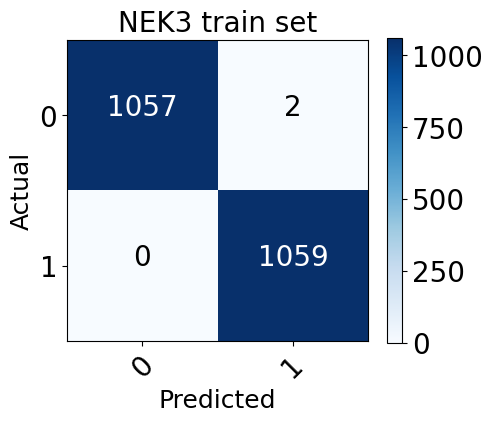

In [19]:
train_prediction = model(train_x).loc.max(0)[1].numpy()
y_true = new_train_y_df.values
y_pred = train_prediction
train_cm = confusion_matrix(y_true, y_pred)
class_names = ["0","1"]

plt.rcParams.update({"font.size": 20})
label_font = {'size':'18'}  # Adjust to fit
ax = plt.figure(figsize=(5,5))
plt.title("NEK3 train set",fontsize=20)
plot_confusion_matrix(train_cm, classes=class_names, normalize=False)
plt.xlabel("Predicted",fontdict=label_font);
plt.ylabel("Actual",fontdict=label_font);


In [15]:
# Make predictions with the model
# Prediction on the test set

model.eval()
likelihood.eval()

with gpytorch.settings.fast_pred_var(), torch.no_grad():
    test_dist = model(test_x)
    test_pred_means = test_dist.loc
    test_pred = likelihood(model(test_x))
    
print(test_pred_means.numpy().shape)
print(test_pred_means.max(0)[1])

(2, 280)
tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
        0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0])


In [16]:
test_prediction = model(test_x).loc.max(0)[1].numpy()
print(test_prediction.shape)
test_prediction

(280,)


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0])

Confusion matrix, without normalization
[[260   4]
 [ 11   5]]


Text(29.47222222222222, 0.5, 'Actual')

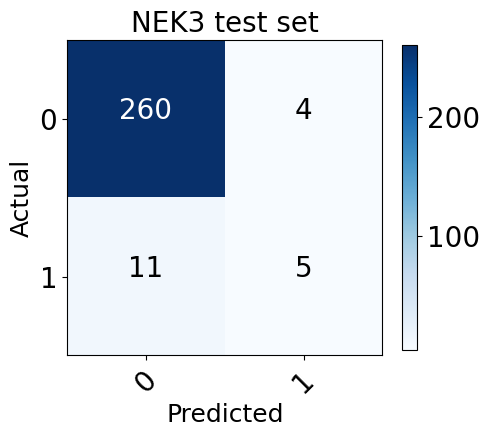

In [25]:
y_true = test_y_df.values
y_pred = test_prediction
test_cm = confusion_matrix(y_true, y_pred)
class_names = ["0","1"]

plt.rcParams.update({"font.size": 20})
label_font = {'size':'18'}  # Adjust to fit
ax = plt.figure(figsize=(5,5))
plt.title("NEK3 test set",fontsize=20)
plot_confusion_matrix(test_cm, classes=class_names, normalize=False)
plt.xlabel("Predicted",fontdict=label_font)
plt.ylabel("Actual",fontdict=label_font)


In [20]:
lower, upper = observed_pred.confidence_region()
upper

tensor([[ 2.8976,  3.0581,  3.1796,  ..., -0.9173, -0.6924, -1.8583],
        [-0.8070, -0.3047, -0.6358,  ...,  1.5622,  2.5616,  1.8595]])

In [21]:
observed_pred.mean.numpy()

array([[-0.4072951 , -0.5042798 , -0.4086362 , ..., -5.5382133 ,
        -5.717454  , -6.5053267 ],
       [-5.9954157 , -5.83551   , -6.233765  , ..., -0.8514457 ,
        -0.32344007, -0.45555544]], dtype=float32)

In [22]:
print(observed_pred.variance.numpy().shape)
observed_pred.variance.numpy()

(2, 2118)


array([[2.730528 , 3.1725898, 3.2188354, ..., 5.3381357, 6.3127337,
        5.398698 ],
       [6.7300205, 7.647587 , 7.8342733, ..., 1.4564052, 2.0809   ,
        1.3399181]], dtype=float32)

In [23]:
print(pred_means.numpy())

[[-0.4072951  -0.5042798  -0.4086362  ... -5.5382133  -5.717454
  -6.5053267 ]
 [-5.9954157  -5.83551    -6.233765   ... -0.8514457  -0.32344007
  -0.45555544]]


In [24]:
# Draw samples from the posterior.
pred_samples = test_dist.sample(torch.Size((256,))).exp()
probabilities = (pred_samples / pred_samples.sum(-2, keepdim=True)).mean(0)
probabilities

tensor([[0.9556, 0.9932, 0.9046, 0.9743, 0.8755, 0.9874, 0.9888, 0.9872, 0.9402,
         0.9264, 0.9868, 0.9241, 0.9499, 0.9684, 0.9668, 0.8946, 0.9650, 0.9813,
         0.9601, 0.9871, 0.8447, 0.9803, 0.9861, 0.9188, 0.9815, 0.9753, 0.7765,
         0.9052, 0.9420, 0.9870, 0.7309, 0.9956, 0.7496, 0.9869, 0.9688, 0.9718,
         0.9591, 0.9883, 0.9884, 0.7677, 0.9819, 0.6404, 0.8765, 0.9399, 0.9699,
         0.9867, 0.9873, 0.9627, 0.9793, 0.9750, 0.9798, 0.5838, 0.9017, 0.9544,
         0.9063, 0.9772, 0.9868, 0.9561, 0.9309, 0.9905, 0.9405, 0.9855, 0.9807,
         0.8528, 0.8429, 0.9620, 0.9416, 0.9656, 0.4922, 0.9767, 0.8859, 0.9736,
         0.8711, 0.9927, 0.9867, 0.9743, 0.9860, 0.8468, 0.8688, 0.9843, 0.9678,
         0.6364, 0.9787, 0.9888, 0.9748, 0.9481, 0.9867, 0.9811, 0.2682, 0.9645,
         0.9868, 0.9680, 0.9121, 0.5299, 0.9735, 0.3913, 0.9932, 0.9739, 0.9939,
         0.3216, 0.9940, 0.7362, 0.9794, 0.9364, 0.9561, 0.9772, 0.9937, 0.9551,
         0.7915, 0.9740, 0.7